# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


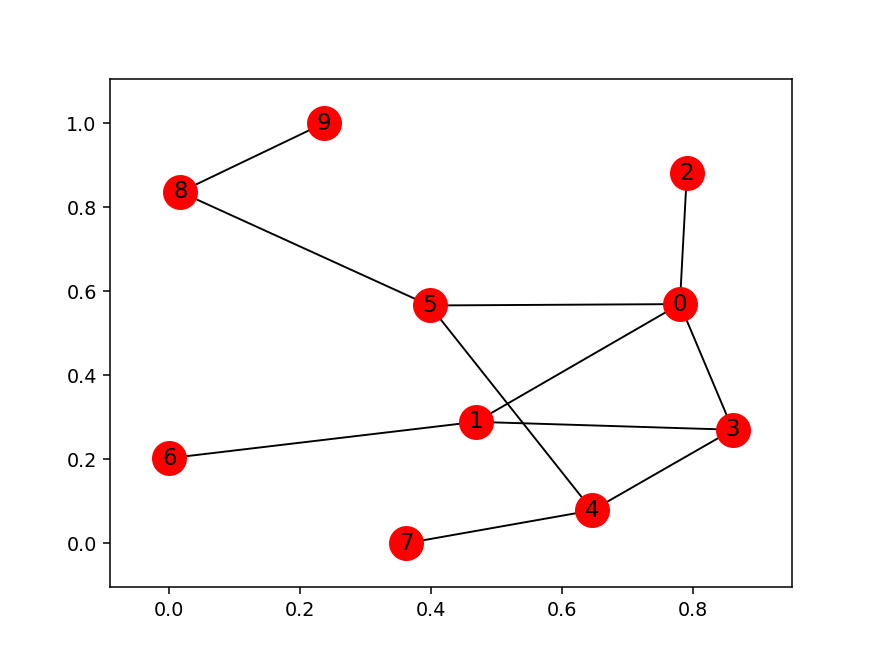

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

### Adjacency List

`G_adjlist.txt` is the adjaceny list representation of G1.

It can be read as follows:
* `0 1 2 3 5` $\rightarrow$ node `0` is adjacent to nodes `1, 2, 3, 5`
* `1 3 6` $\rightarrow$ node `1` is (also) adjacent to nodes `3, 6`
* `2` $\rightarrow$ node `2` is (also) adjacent to no new nodes
* `3 4` $\rightarrow$ node `3` is (also) adjacent to node `4` 

and so on. Note that adjacencies are only accounted for once (e.g. node `2` is adjacent to node `0`, but node `0` is not listed in node `2`'s row, because that edge has already been accounted for in node `0`'s row).

In [48]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


If we read in the adjacency list using `nx.read_adjlist`, we can see that it matches `G1`.

In [3]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

### Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row `0`, column `1` corresponds to the edge between node `0` and node `1`.  

Reading across row `0`, there is a '`1`' in columns `1`, `2`, `3`, and `5`, which indicates that node `0` is adjacent to nodes 1, 2, 3, and 5

In [4]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

If we convert the adjacency matrix to a networkx graph using `nx.Graph`, we can see that it matches G1.

In [5]:
G3 = nx.Graph(G_mat)
G3.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (4, 5),
 (4, 7),
 (5, 8),
 (8, 9)]

### Edgelist

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns. Looking at `G_edgelist.txt` this is the same as the original graph `G1`, but now each edge has a weight. 

For example, from the first row, we can see the edge between nodes `0` and `1`, has a weight of `4`.

In [49]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


Using `read_edgelist` and passing in a list of tuples with the name and type of each edge attribute will create a graph with our desired edge attributes.

In [50]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

[('0', '1', {'Weight': 4}),
 ('0', '2', {'Weight': 3}),
 ('0', '3', {'Weight': 2}),
 ('0', '5', {'Weight': 6}),
 ('1', '3', {'Weight': 2}),
 ('1', '6', {'Weight': 5}),
 ('3', '4', {'Weight': 3}),
 ('5', '4', {'Weight': 1}),
 ('5', '8', {'Weight': 6}),
 ('4', '7', {'Weight': 2}),
 ('8', '9', {'Weight': 1})]

### Pandas DataFrame

Graphs can also be created from pandas dataframes if they are in edge list format.

In [8]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [9]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

### Chess Example

Now let's load in a more complex graph and perform some basic analysis on it.

We will be looking at chess_graph.txt, which is a directed graph of chess games in edge list format.

In [51]:
!head -5 chess_graph.txt

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997
7 8 0	885635999.999997
7 9 1	885635999.999997
7 10 1	885635999.999997
11 12 -1	885635999.999997
13 14 1	885635999.999997
15 16 1	885635999.999997
17 18 -1	885635999.999997
19 7 0	885635999.999997
19 8 0	885635999.999997
19 20 -1	885635999.999997
19 21 -1	885635999.999997
19 22 1	885635999.999997
23 1 -1	885635999.999997
23 2 -1	885635999.999997
23 3 1	885635999.999997
24 25 1	885635999.999997
26 27 -1	885635999.999997
28 29 1	885635999.999997
30 31 1	885635999.999997
32 33 0	885635999.999997
32 34 0	885635999.999997
32 35 0	885635999.999997
32 36 0	885635999.999997
32 37 1	885635999.999997
38 39 1	885635999.999997
38 40 1	885635999.999997
38 41 -1	885635999.999997
33 42 0	885635999.999997
33 43 0	885635999.999997
44 19 0	885635999.999997
44 45 0	885635999.999997
44 46 0	885635999.999997
34 47 0	885635999.999997
34 48 0	885635999.999997
49 50 1	885635999.999997
49 12 -1	885

42 458 0	890892000
569 549 0	890892000
569 583 0	890892000
569 461 0	890892000
577 21 0	890892000
577 366 1	890892000
468 611 0	890892000
468 462 0	890892000
376 400 -1	890892000
538 603 1	890892000
538 413 1	890892000
562 563 0	890892000
562 475 1	890892000
578 488 0	890892000
578 489 1	890892000
578 358 0	890892000
473 612 0	890892000
246 549 1	890892000
246 583 1	890892000
246 460 0	890892000
248 537 -1	890892000
248 410 1	890892000
248 610 -1	890892000
251 584 1	890892000
251 613 1	890892000
188 519 -1	890892000
563 609 1	890892000
563 614 1	890892000
396 375 0	890892000
396 399 -1	890892000
396 397 1	890892000
568 414 -1	890892000
614 533 0	890892000
614 555 -1	890892000
614 564 -1	890892000
536 381 1	890892000
536 339 -1	890892000
536 398 0	890892000
536 173 -1	890892000
536 143 -1	890892000
536 59 1	890892000
308 615 -1	890892000
410 473 0	890892000
264 588 0	890892000
264 205 0	890892000
264 579 0	890892000
91 109 -1	890892000
66 112 0	890892000
527 193 0	890892000
527 528 -1	8

1070 641 0	901403999.999997
1121 1122 1	901403999.999997
1061 1054 1	901403999.999997
1061 1014 -1	901403999.999997
1061 66 0	901403999.999997
1061 824 1	901403999.999997
1032 1123 0	901403999.999997
1032 1124 1	901403999.999997
1032 1125 0	901403999.999997
1032 958 1	901403999.999997
1113 765 0	901403999.999997
1113 396 -1	901403999.999997
1126 1015 -1	901403999.999997
1040 1126 1	901403999.999997
1123 1031 0	901403999.999997
1123 141 1	901403999.999997
1123 958 -1	901403999.999997
1127 734 0	901403999.999997
1128 1129 0	901403999.999997
142 668 -1	901403999.999997
142 818 0	901403999.999997
142 91 1	901403999.999997
226 1062 1	901403999.999997
226 1111 0	901403999.999997
502 443 -1	901403999.999997
502 508 1	901403999.999997
502 842 0	901403999.999997
1051 109 1	901403999.999997
1051 310 1	901403999.999997
1051 1107 1	901403999.999997
1051 930 -1	901403999.999997
1051 1130 1	901403999.999997
461 285 1	901403999.999997
461 1131 0	901403999.999997
461 1132 1	901403999.999997
1133 1043 

1283 1285 0	906660000
1283 1286 -1	906660000
1287 1238 0	906660000
1287 453 1	906660000
1287 1288 1	906660000
1024 710 1	906660000
1024 1289 -1	906660000
1024 991 0	906660000
1024 1224 1	906660000
1024 1151 0	906660000
651 885 -1	906660000
651 436 -1	906660000
1290 1291 0	906660000
1292 1293 -1	906660000
1027 1181 0	906660000
1027 1294 0	906660000
1295 1256 1	906660000
1295 1296 1	906660000
1295 1297 1	906660000
1295 1248 0	906660000
659 1202 -1	906660000
659 487 0	906660000
659 543 1	906660000
659 731 0	906660000
1298 1036 1	906660000
1299 882 0	906660000
1299 1300 0	906660000
1299 1301 -1	906660000
1299 763 1	906660000
1299 1302 1	906660000
556 1303 1	906660000
556 211 0	906660000
556 1304 1	906660000
556 1245 -1	906660000
1305 1306 -1	906660000
1307 659 0	906660000
1307 450 1	906660000
1307 1308 0	906660000
1307 862 0	906660000
664 1309 1	906660000
664 121 -1	906660000
664 300 1	906660000
664 123 1	906660000
664 1310 1	906660000
1311 1312 -1	906660000
1311 703 -1	906660000
1311 1313

1836 1346 0	911916000.000003
1836 1834 0	911916000.000003
1836 680 1	911916000.000003
1836 179 -1	911916000.000003
798 188 0	911916000.000003
257 714 1	911916000.000003
257 801 1	911916000.000003
257 580 0	911916000.000003
874 651 -1	911916000.000003
874 1866 0	911916000.000003
1831 1820 0	911916000.000003
1831 701 0	911916000.000003
1826 1825 0	911916000.000003
1826 939 1	911916000.000003
1826 1835 1	911916000.000003
166 1346 0	911916000.000003
166 1829 0	911916000.000003
166 908 1	911916000.000003
166 179 -1	911916000.000003
299 1838 1	911916000.000003
299 333 1	911916000.000003
299 252 0	911916000.000003
59 1828 0	911916000.000003
59 907 0	911916000.000003
59 680 0	911916000.000003
586 503 0	911916000.000003
519 563 1	911916000.000003
356 1842 0	911916000.000003
356 299 1	911916000.000003
1867 1398 1	911916000.000003
1867 1555 -1	911916000.000003
1867 874 0	911916000.000003
1823 901 0	911916000.000003
1823 200 -1	911916000.000003
1823 436 0	911916000.000003
1823 79 1	911916000.00000

2019 829 -1	925055999.999997
3 1 0	925055999.999997
3 808 0	925055999.999997
2105 171 -1	925055999.999997
2106 200 -1	925055999.999997
2106 1660 -1	925055999.999997
777 1025 0	925055999.999997
777 1908 1	925055999.999997
2130 286 0	925055999.999997
914 2086 1	925055999.999997
1719 2111 1	925055999.999997
1719 2096 1	925055999.999997
1719 2083 1	925055999.999997
231 30 0	925055999.999997
231 2057 0	925055999.999997
231 653 0	925055999.999997
231 654 0	925055999.999997
231 2131 1	925055999.999997
2088 2132 -1	925055999.999997
302 159 1	925055999.999997
445 491 0	925055999.999997
445 415 0	925055999.999997
2133 674 0	925055999.999997
2133 2104 0	925055999.999997
74 728 0	925055999.999997
74 1226 0	925055999.999997
609 2019 1	925055999.999997
609 519 0	925055999.999997
1730 1663 1	925055999.999997
2134 436 -1	925055999.999997
2135 171 -1	925055999.999997
197 2096 1	925055999.999997
197 2136 1	925055999.999997
197 1506 0	925055999.999997
2095 444 -1	925055999.999997
2095 580 -1	925055999.99

941 2379 1	935568000.000003
941 122 -1	935568000.000003
684 1195 1	935568000.000003
943 1191 1	935568000.000003
943 1202 0	935568000.000003
1939 203 1	935568000.000003
335 455 0	935568000.000003
335 186 0	935568000.000003
335 519 0	935568000.000003
537 580 0	935568000.000003
2091 809 -1	935568000.000003
2091 2057 0	935568000.000003
2091 981 -1	935568000.000003
495 289 0	935568000.000003
1177 497 -1	935568000.000003
2119 1380 -1	935568000.000003
2119 2404 0	935568000.000003
2119 160 0	935568000.000003
2119 235 -1	935568000.000003
2119 171 0	935568000.000003
2119 1998 0	935568000.000003
2119 2074 1	935568000.000003
482 673 1	935568000.000003
482 1007 0	935568000.000003
139 1651 0	935568000.000003
139 789 0	935568000.000003
542 1302 0	935568000.000003
1202 1651 1	935568000.000003
1202 862 0	935568000.000003
900 2109 0	935568000.000003
900 2113 1	935568000.000003
432 2400 -1	935568000.000003
2405 1283 1	935568000.000003
1205 1179 1	935568000.000003
1205 1171 0	935568000.000003
112 313 0	93

384 676 -1	940823999.999997
226 1243 1	940823999.999997
226 638 0	940823999.999997
226 1308 0	940823999.999997
226 1791 -1	940823999.999997
2646 2537 0	940823999.999997
2646 219 0	940823999.999997
573 476 1	940823999.999997
573 913 1	940823999.999997
143 57 1	940823999.999997
143 1966 -1	940823999.999997
143 109 1	940823999.999997
983 446 1	940823999.999997
983 462 1	940823999.999997
1221 833 -1	940823999.999997
1221 158 0	940823999.999997
1221 354 0	940823999.999997
1221 1973 1	940823999.999997
237 487 -1	940823999.999997
777 1244 0	940823999.999997
777 601 -1	940823999.999997
777 1546 1	940823999.999997
1839 2644 -1	940823999.999997
1839 2645 -1	940823999.999997
1839 1853 1	940823999.999997
1195 201 0	940823999.999997
1195 1302 0	940823999.999997
605 2188 -1	940823999.999997
605 538 0	940823999.999997
1302 1243 -1	940823999.999997
1302 1711 0	940823999.999997
1244 1401 1	940823999.999997
1244 500 1	940823999.999997
2134 164 -1	940823999.999997
2134 400 -1	940823999.999997
496 546 0	9

738 707 0	953964000
2392 392 0	953964000
1220 2392 0	953964000
1220 1088 -1	953964000
1501 87 1	953964000
1501 109 0	953964000
1968 1054 1	953964000
1968 691 -1	953964000
1968 792 -1	953964000
1968 793 1	953964000
1112 707 1	953964000
2722 112 0	953964000
2722 2727 1	953964000
2722 842 1	953964000
1766 1490 0	953964000
1768 1490 0	953964000
798 2720 1	953964000
299 1819 0	953964000
299 31 -1	953964000
299 252 1	953964000
59 2224 -1	953964000
59 1499 0	953964000
2796 443 1	953964000
239 1819 1	953964000
239 330 -1	953964000
239 1931 1	953964000
239 299 0	953964000
586 1677 1	953964000
272 333 1	953964000
272 2804 1	953964000
272 1931 0	953964000
2626 2453 1	953964000
2626 242 0	953964000
2626 2669 1	953964000
2425 1298 0	953964000
2425 1930 -1	953964000
462 31 1	953964000
462 583 1	953964000
462 1931 0	953964000
462 461 0	953964000
462 299 1	953964000
462 239 1	953964000
860 1949 0	953964000
860 1927 1	953964000
423 2797 0	953964000
423 832 -1	953964000
423 2801 1	953964000
423 2812 1	9

1214 691 1	972359999.999997
1214 2392 -1	972359999.999997
1214 1234 0	972359999.999997
1214 1921 0	972359999.999997
2238 2237 -1	972359999.999997
2238 2193 -1	972359999.999997
2238 2266 0	972359999.999997
2238 2677 0	972359999.999997
523 1498 0	972359999.999997
523 2803 1	972359999.999997
523 2799 1	972359999.999997
2422 558 1	972359999.999997
2101 2066 1	972359999.999997
2101 2077 1	972359999.999997
2101 197 -1	972359999.999997
2101 2126 1	972359999.999997
203 2077 0	972359999.999997
203 2097 0	972359999.999997
460 2988 1	972359999.999997
460 2804 0	972359999.999997
460 2990 1	972359999.999997
460 362 0	972359999.999997
1635 71 0	972359999.999997
1635 1114 1	972359999.999997
1635 989 0	972359999.999997
1635 1853 0	972359999.999997
813 2992 0	972359999.999997
813 658 0	972359999.999997
2108 2382 1	972359999.999997
2431 2096 1	972359999.999997
2431 558 0	972359999.999997
2431 2116 0	972359999.999997
2984 1284 1	972359999.999997
2087 2228 1	972359999.999997
226 1047 1	972359999.999997
19

636 3158 -1	988127999.999997
636 3095 0	988127999.999997
3159 3160 1	988127999.999997
3159 1061 -1	988127999.999997
443 573 -1	988127999.999997
443 475 1	988127999.999997
446 2405 1	988127999.999997
446 1057 0	988127999.999997
3080 2013 0	988127999.999997
1219 3159 0	988127999.999997
1219 3160 1	988127999.999997
1219 1061 0	988127999.999997
1219 958 0	988127999.999997
455 66 1	988127999.999997
652 674 1	988127999.999997
652 778 1	988127999.999997
652 1366 1	988127999.999997
465 251 0	988127999.999997
465 1184 1	988127999.999997
465 1711 1	988127999.999997
465 968 1	988127999.999997
1186 725 0	988127999.999997
1186 673 1	988127999.999997
1186 462 -1	988127999.999997
1016 913 0	988127999.999997
1016 641 0	988127999.999997
1016 536 1	988127999.999997
467 383 1	988127999.999997
467 446 1	988127999.999997
467 734 1	988127999.999997
467 1791 1	988127999.999997
467 623 0	988127999.999997
467 1231 1	988127999.999997
467 500 0	988127999.999997
467 124 0	988127999.999997
476 684 0	988127999.9999

1506 883 0	996011999.999997
360 2463 1	996011999.999997
360 825 0	996011999.999997
2661 1944 1	996011999.999997
2244 89 0	996011999.999997
2244 3274 1	996011999.999997
2244 1157 1	996011999.999997
1993 302 0	996011999.999997
3263 1866 1	996011999.999997
3263 376 -1	996011999.999997
3263 797 0	996011999.999997
1997 456 -1	996011999.999997
1997 482 1	996011999.999997
3282 334 0	996011999.999997
3282 337 -1	996011999.999997
3282 164 -1	996011999.999997
1944 2468 -1	996011999.999997
1944 2927 0	996011999.999997
1944 2278 0	996011999.999997
797 647 0	996011999.999997
797 3265 0	996011999.999997
797 2515 0	996011999.999997
797 2330 0	996011999.999997
797 1973 1	996011999.999997
1363 345 0	996011999.999997
1657 66 1	996011999.999997
1657 1684 -1	996011999.999997
1657 1711 0	996011999.999997
120 647 0	996011999.999997
207 77 1	996011999.999997
207 79 1	996011999.999997
207 278 0	996011999.999997
1684 3146 -1	996011999.999997
574 742 1	996011999.999997
574 1997 0	996011999.999997
2773 360 0	996

2207 1313 -1	1003896000
2207 1631 0	1003896000
1760 1582 -1	1003896000
1761 264 0	1003896000
2969 2913 0	1003896000
2969 1318 0	1003896000
1997 1023 1	1003896000
1997 446 0	1003896000
1997 447 -1	1003896000
1997 1511 1	1003896000
3122 1370 0	1003896000
3122 2511 -1	1003896000
3122 2492 0	1003896000
3122 1808 -1	1003896000
1481 455 -1	1003896000
2319 3401 1	1003896000
2590 2611 1	1003896000
2590 1752 1	1003896000
2518 24 0	1003896000
2518 199 0	1003896000
3416 3407 0	1003896000
3416 3412 -1	1003896000
1768 965 1	1003896000
1768 118 0	1003896000
1768 1481 0	1003896000
1571 3431 1	1003896000
1571 2152 0	1003896000
1148 1177 0	1003896000
1148 612 0	1003896000
3414 3431 0	1003896000
3414 2661 -1	1003896000
3414 3434 1	1003896000
997 960 1	1003896000
997 153 0	1003896000
997 1958 0	1003896000
1657 451 1	1003896000
736 1562 0	1003896000
1103 237 -1	1003896000
1103 515 0	1003896000
207 1027 -1	1003896000
207 1202 -1	1003896000
207 500 -1	1003896000
1774 1715 -1	1003896000
1774 2977 1	100389600

3153 3083 0	1017036000
3153 2129 -1	1017036000
3153 572 -1	1017036000
2750 2751 -1	1017036000
2750 1811 1	1017036000
2750 2752 -1	1017036000
2714 2013 0	1017036000
2714 822 0	1017036000
2714 261 0	1017036000
2013 3574 1	1017036000
636 2722 -1	1017036000
636 416 0	1017036000
636 56 1	1017036000
2310 2055 -1	1017036000
2310 725 -1	1017036000
2310 3572 -1	1017036000
2310 864 0	1017036000
2296 2330 0	1017036000
455 483 0	1017036000
455 496 -1	1017036000
455 741 0	1017036000
455 419 1	1017036000
2056 1168 -1	1017036000
2056 864 1	1017036000
465 636 1	1017036000
465 3077 1	1017036000
1054 1175 0	1017036000
1054 3575 1	1017036000
2242 2568 1	1017036000
2242 161 0	1017036000
2242 1949 0	1017036000
2242 403 1	1017036000
447 788 1	1017036000
2224 543 -1	1017036000
3576 1820 -1	1017036000
3576 354 -1	1017036000
333 583 -1	1017036000
333 362 0	1017036000
333 1581 -1	1017036000
98 440 1	1017036000
822 656 -1	1017036000
822 572 0	1017036000
2751 2752 0	1017036000
2751 3577 0	1017036000
2751 3122 0	1

2509 2467 1	1024920000
2509 1944 -1	1024920000
2509 824 -1	1024920000
3678 647 0	1024920000
3678 649 -1	1024920000
130 537 1	1024920000
130 801 0	1024920000
537 92 -1	1024920000
537 130 1	1024920000
537 500 0	1024920000
537 801 0	1024920000
137 2468 0	1024920000
137 2509 -1	1024920000
1963 187 -1	1024920000
1963 654 1	1024920000
1963 452 0	1024920000
2763 1366 0	1024920000
2763 2357 0	1024920000
2763 2506 1	1024920000
1202 2283 1	1024920000
2904 1927 1	1024920000
2904 1184 1	1024920000
1574 3688 1	1024920000
3680 1592 1	1024920000
2684 3106 -1	1024920000
2684 1210 0	1024920000
2684 3668 1	1024920000
2368 2903 -1	1024920000
3694 2653 0	1024920000
3695 2307 1	1024920000
3695 1556 1	1024920000
3695 3106 1	1024920000
3695 3281 1	1024920000
3695 1989 0	1024920000
3584 1820 1	1024920000
3584 3678 1	1024920000
3584 701 0	1024920000
3696 647 -1	1024920000
3696 1820 -1	1024920000
3696 3677 1	1024920000
3488 504 0	1024920000
3488 609 0	1024920000
3675 3679 0	1024920000
3675 834 0	1024920000
3675

228 3497 0	1032804000
228 2545 0	1032804000
228 560 0	1032804000
503 1440 1	1032804000
503 447 1	1032804000
503 545 0	1032804000
503 79 1	1032804000
3826 888 1	1032804000
1890 1997 0	1032804000
1257 2643 1	1032804000
2887 3299 1	1032804000
2887 37 -1	1032804000
952 371 0	1032804000
952 2307 1	1032804000
952 641 0	1032804000
1430 1222 0	1032804000
1625 3193 -1	1032804000
3271 3827 1	1032804000
3662 151 -1	1032804000
3662 1449 1	1032804000
3822 539 1	1032804000
3822 3757 1	1032804000
1997 3123 1	1032804000
1997 238 1	1032804000
1997 1184 0	1032804000
3303 1430 1	1032804000
3828 1450 0	1032804000
3828 536 -1	1032804000
3828 736 0	1032804000
1297 961 -1	1032804000
3829 1459 1	1032804000
3829 201 -1	1032804000
902 139 1	1032804000
610 476 -1	1032804000
610 545 0	1032804000
610 1197 0	1032804000
1769 3825 -1	1032804000
1769 3823 1	1032804000
1769 229 -1	1032804000
1769 385 -1	1032804000
436 638 1	1032804000
436 1128 1	1032804000
436 635 0	1032804000
1148 1548 1	1032804000
171 1623 -1	1032804

130 200 0	1040688000
130 171 1	1040688000
537 621 0	1040688000
537 275 0	1040688000
622 3926 0	1040688000
622 2106 1	1040688000
622 178 0	1040688000
1177 3548 1	1040688000
1177 1180 1	1040688000
1177 1056 1	1040688000
1202 2170 -1	1040688000
1202 731 0	1040688000
3348 2380 1	1040688000
653 211 0	1040688000
653 461 0	1040688000
653 1677 1	1040688000
2666 3663 0	1040688000
2666 1735 0	1040688000
439 467 1	1040688000
439 621 0	1040688000
439 275 0	1040688000
169 188 -1	1040688000
169 1117 -1	1040688000
3754 605 0	1040688000
1983 880 -1	1040688000
2998 2988 -1	1040688000
2998 1933 -1	1040688000
2998 3109 0	1040688000
1108 664 1	1040688000
1108 200 0	1040688000
1108 1782 1	1040688000
1108 1711 1	1040688000
61 2071 0	1040688000
61 1782 0	1040688000
61 1497 -1	1040688000
164 237 0	1040688000
164 748 0	1040688000
164 1056 1	1040688000
164 2002 0	1040688000
187 1210 1	1040688000
3926 418 0	1040688000
3926 61 -1	1040688000
387 692 1	1040688000
387 122 1	1040688000
3004 2988 -1	1040688000
3004 29

3605 2812 1	1053828000
1623 4079 1	1053828000
1931 3312 1	1053828000
1931 449 -1	1053828000
753 1131 0	1053828000
753 416 -1	1053828000
861 92 0	1053828000
861 2990 1	1053828000
861 112 0	1053828000
861 1197 0	1053828000
1706 3999 0	1053828000
1706 503 -1	1053828000
1706 1791 -1	1053828000
461 1928 0	1053828000
461 1533 1	1053828000
461 861 -1	1053828000
1927 2988 1	1053828000
1927 1931 1	1053828000
1933 2990 -1	1053828000
1933 560 -1	1053828000
1933 3830 1	1053828000
4058 4077 1	1053828000
4058 3862 -1	1053828000
4058 4080 1	1053828000
3326 387 0	1053828000
3326 586 -1	1053828000
3326 412 1	1053828000
3326 595 1	1053828000
2718 98 0	1053828000
2718 1057 1	1053828000
2718 239 -1	1053828000
304 2376 0	1053828000
304 3917 1	1053828000
304 4050 1	1053828000
4060 910 -1	1053828000
1026 1362 1	1053828000
2810 2376 1	1053828000
2810 304 -1	1053828000
2836 2067 1	1053828000
2836 92 1	1053828000
2836 1197 -1	1053828000
2836 579 0	1053828000
4081 1711 -1	1053828000
983 2255 1	1053828000
983 423

801 13 1	1061712000
801 439 0	1061712000
801 280 1	1061712000
281 2888 -1	1061712000
580 330 0	1061712000
580 237 1	1061712000
579 3509 0	1061712000
579 2133 1	1061712000
1065 778 0	1061712000
593 3972 1	1061712000
593 513 -1	1061712000
593 238 -1	1061712000
593 270 1	1061712000
278 4018 1	1061712000
278 461 1	1061712000
64 1928 1	1061712000
64 53 0	1061712000
4151 2343 -1	1061712000
4151 2812 0	1061712000
4151 593 0	1061712000
2288 640 0	1061712000
3109 462 -1	1061712000
4170 673 -1	1061712000
634 112 -1	1061712000
634 3299 1	1061712000
634 64 0	1061712000
635 647 1	1061712000
275 371 0	1061712000
275 439 0	1061712000
275 280 0	1061712000
1056 447 0	1061712000
1056 1214 0	1061712000
3833 2376 0	1061712000
1294 647 0	1061712000
385 421 -1	1061712000
385 64 0	1061712000
56 3348 1	1061712000
4171 2408 -1	1061712000
4171 4081 0	1061712000
4171 462 0	1061712000
3438 3150 0	1061712000
3438 1196 0	1061712000
1160 471 1	1061712000
2050 2150 0	1064340000
1 925 1	1064340000
1 91 1	1064340000
63

30 330 0	1069596000
1180 1097 1	1069596000
1180 1214 0	1069596000
2296 787 0	1069596000
2296 1221 0	1069596000
2296 2843 1	1069596000
2237 3645 1	1069596000
2237 3458 -1	1069596000
2237 3201 0	1069596000
2237 3406 1	1069596000
3918 2903 -1	1069596000
3918 2995 1	1069596000
3918 1949 1	1069596000
3460 1180 0	1069596000
3460 1711 1	1069596000
2242 3918 1	1069596000
2242 1949 0	1069596000
1965 448 0	1069596000
1965 3458 1	1069596000
1965 3406 0	1069596000
825 189 0	1069596000
825 3921 1	1069596000
825 2791 0	1069596000
825 366 0	1069596000
3547 825 -1	1069596000
3547 189 -1	1069596000
3547 3921 1	1069596000
2711 2296 0	1069596000
2903 2242 -1	1069596000
2903 2995 -1	1069596000
312 2738 -1	1069596000
721 1087 1	1069596000
721 1201 -1	1069596000
721 2655 0	1069596000
448 2237 1	1069596000
448 91 0	1069596000
3645 1965 -1	1069596000
3645 3458 0	1069596000
122 1819 0	1069596000
122 798 0	1069596000
122 388 1	1069596000
122 1891 -1	1069596000
1087 715 0	1069596000
1087 1153 0	1069596000
1087 2

479 4298 -1	1082736000
479 4307 1	1082736000
479 4333 -1	1082736000
574 2233 1	1082736000
574 334 1	1082736000
574 1177 0	1082736000
621 436 1	1082736000
1776 468 1	1082736000
1357 1254 0	1082736000
2445 3608 0	1082736000
1184 692 1	1082736000
1184 487 0	1082736000
299 1167 1	1082736000
299 2233 0	1082736000
2796 455 -1	1082736000
2796 1095 0	1082736000
45 3767 1	1082736000
45 1257 0	1082736000
272 1401 0	1082736000
272 1169 -1	1082736000
272 45 1	1082736000
127 349 0	1082736000
127 595 1	1082736000
127 2681 -1	1082736000
3608 1054 1	1082736000
3608 1169 1	1082736000
3608 287 -1	1082736000
1245 1623 0	1082736000
1245 801 0	1082736000
3786 1385 0	1082736000
3786 534 -1	1082736000
775 3873 0	1082736000
775 1709 1	1082736000
775 741 -1	1082736000
775 132 -1	1082736000
1235 4298 1	1082736000
1235 914 0	1082736000
1782 2445 1	1082736000
4297 2328 0	1082736000
4297 1385 1	1082736000
4321 2711 -1	1082736000
4321 4322 0	1082736000
6 913 0	1082736000
6 1308 -1	1082736000
6 2972 0	1082736000
449

36 2032 0	1095876000
53 457 1	1095876000
673 53 0	1095876000
673 588 0	1095876000
211 659 1	1095876000
4463 4245 1	1095876000
4463 1226 0	1095876000
4464 1971 0	1095876000
1214 2055 1	1095876000
1214 3295 0	1095876000
4452 4451 0	1095876000
4456 3111 0	1095876000
4456 566 0	1095876000
4456 186 -1	1095876000
2189 4446 1	1095876000
328 3071 0	1095876000
1675 3524 -1	1095876000
1636 2391 1	1095876000
4167 2902 -1	1095876000
4006 4336 1	1095876000
4006 4257 0	1095876000
4006 3085 -1	1095876000
588 4453 1	1095876000
3747 44 1	1095876000
3747 2391 -1	1095876000
4465 3855 -1	1095876000
4327 2820 0	1095876000
4327 4295 -1	1095876000
2876 1719 -1	1095876000
2876 1226 0	1095876000
2876 1785 -1	1095876000
4448 471 -1	1095876000
1489 2429 1	1095876000
1533 3319 1	1095876000
1533 449 0	1095876000
2433 3838 -1	1095876000
753 466 0	1095876000
753 566 0	1095876000
753 186 0	1095876000
186 3706 1	1095876000
186 193 1	1095876000
186 3232 0	1095876000
186 3600 1	1095876000
1933 3309 -1	1095876000
1933 95

1383 2739 0	1101132000
3038 3101 -1	1101132000
3038 101 0	1101132000
4544 4535 0	1101132000
3281 2090 -1	1101132000
3281 482 -1	1101132000
3135 3101 0	1101132000
3135 4541 1	1101132000
1491 2006 -1	1101132000
1491 3871 1	1101132000
1491 4534 -1	1101132000
4313 424 0	1101132000
4313 3776 0	1101132000
4313 130 -1	1101132000
4313 973 -1	1101132000
3001 3101 0	1101132000
3001 1081 0	1101132000
3001 2252 1	1101132000
4030 3871 0	1101132000
4030 2392 -1	1101132000
91 2765 0	1101132000
91 18 0	1101132000
66 787 0	1101132000
66 1179 1	1101132000
66 2296 0	1101132000
66 1030 1	1101132000
3966 3182 0	1101132000
3966 4338 -1	1101132000
2392 447 1	1101132000
2392 3056 0	1101132000
2392 627 0	1101132000
3921 189 0	1101132000
1201 1087 1	1101132000
1201 12 1	1101132000
1201 224 0	1101132000
1201 272 0	1101132000
1201 3018 -1	1101132000
2179 3871 0	1101132000
2179 2919 0	1101132000
712 4541 1	1101132000
712 3112 0	1101132000
207 801 -1	1101132000
3201 1123 0	1101132000
3201 3940 1	1101132000
3201 3 0

3927 3814 -1	1111644000
108 1472 0	1111644000
4594 74 -1	1111644000
721 456 0	1111644000
721 246 1	1111644000
721 14 -1	1111644000
833 913 1	1111644000
833 3073 1	1111644000
833 362 1	1111644000
725 1777 1	1111644000
725 3215 0	1111644000
2934 1339 1	1111644000
2934 124 1	1111644000
4638 4659 0	1111644000
4638 4610 0	1111644000
4638 4741 1	1111644000
728 731 1	1111644000
3443 2089 -1	1111644000
1350 1131 -1	1111644000
1350 3608 0	1111644000
1350 3535 0	1111644000
4742 3993 1	1111644000
4742 3538 -1	1111644000
129 4594 1	1111644000
129 1192 1	1111644000
129 4738 0	1111644000
129 4367 1	1111644000
3873 816 1	1111644000
3419 3443 1	1111644000
3419 149 1	1111644000
3476 2307 -1	1111644000
3476 4162 0	1111644000
3476 2685 -1	1111644000
2255 543 0	1111644000
2255 246 1	1111644000
2255 1609 0	1111644000
2255 3250 -1	1111644000
2255 219 1	1111644000
3083 3524 1	1111644000
4740 2067 -1	1111644000
4740 3799 1	1111644000
537 3533 0	1111644000
1271 447 -1	1111644000
1271 2189 -1	1111644000
4000 40

2353 3590 1	1122156000
90 2765 0	1122156000
2943 2933 1	1122156000
2943 2266 0	1122156000
2943 2703 0	1122156000
4889 3836 -1	1122156000
215 12 0	1122156000
215 220 0	1122156000
215 1932 1	1122156000
1674 1289 0	1122156000
1674 4448 1	1122156000
1674 4890 1	1122156000
1674 4059 0	1122156000
4880 826 0	1122156000
4880 4338 1	1122156000
742 1080 1	1122156000
742 357 -1	1122156000
4891 873 1	1122156000
4078 3862 0	1122156000
4448 1289 0	1122156000
4448 4890 1	1122156000
4448 4059 0	1122156000
82 2765 -1	1122156000
82 1125 -1	1122156000
25 215 1	1122156000
4883 4862 0	1122156000
4883 3473 1	1122156000
220 12 0	1122156000
220 4886 -1	1122156000
220 1932 1	1122156000
1123 90 1	1122156000
1123 2765 -1	1122156000
4892 4893 1	1122156000
4892 4387 -1	1122156000
4338 4211 -1	1122156000
4338 4880 0	1122156000
1932 12 0	1122156000
1932 4886 0	1122156000
1932 25 -1	1122156000
753 473 0	1122156000
2996 113 0	1122156000
2996 3543 -1	1122156000
4833 3449 0	1122156000
1480 848 1	1122156000
1480 330 0	11

5211 5213 1	1127412000
5211 1903 0	1127412000
5214 4245 -1	1127412000
5214 5215 0	1127412000
5214 4402 0	1127412000
1329 3729 1	1127412000
1329 2819 0	1127412000
1329 3960 1	1127412000
1329 1131 -1	1127412000
1329 1026 1	1127412000
1854 2006 -1	1127412000
1854 486 0	1127412000
1854 3608 0	1127412000
1854 1615 0	1127412000
2480 5216 0	1127412000
1440 2545 0	1127412000
1440 502 0	1127412000
1440 4295 1	1127412000
5217 1179 -1	1127412000
5217 3651 0	1127412000
5217 1447 -1	1127412000
5218 3504 -1	1127412000
672 2361 0	1127412000
815 1408 0	1127412000
815 3021 1	1127412000
815 5219 1	1127412000
815 1615 0	1127412000
4180 5220 -1	1127412000
5221 3248 1	1127412000
5222 5223 0	1127412000
1809 1816 1	1127412000
1809 2513 1	1127412000
1809 5224 1	1127412000
1809 2225 1	1127412000
5225 1698 1	1127412000
418 673 0	1127412000
418 4595 1	1127412000
418 1728 -1	1127412000
3295 3744 1	1127412000
3365 1477 0	1127412000
3365 4951 0	1127412000
5226 5227 0	1127412000
5228 1903 0	1127412000
5229 5230 -1	1

801 53 1	1127412000
801 257 1	1127412000
801 1791 0	1127412000
801 1791 1	1127412000
5158 2470 0	1127412000
1667 5405 0	1127412000
1667 5615 0	1127412000
1891 5374 1	1127412000
4725 4765 -1	1127412000
4725 5434 0	1127412000
5627 5349 -1	1127412000
3204 4528 0	1127412000
3204 1406 -1	1127412000
1007 815 1	1127412000
1007 1689 1	1127412000
2636 2525 1	1127412000
364 2340 1	1127412000
364 4996 1	1127412000
5588 5194 1	1127412000
5588 5265 0	1127412000
5588 5374 0	1127412000
5615 2914 -1	1127412000
891 1166 0	1127412000
891 3934 0	1127412000
891 1169 0	1127412000
891 1192 1	1127412000
891 171 -1	1127412000
891 234 -1	1127412000
580 913 0	1127412000
580 3299 1	1127412000
580 275 1	1127412000
1794 5313 0	1127412000
1794 3825 0	1127412000
1794 1666 0	1127412000
1794 2336 0	1127412000
3814 3200 1	1127412000
3814 276 1	1127412000
2278 1827 0	1127412000
2278 807 1	1127412000
5628 5629 -1	1127412000
1921 5177 1	1127412000
5320 1354 -1	1127412000
5320 5506 0	1127412000
5320 1633 0	1127412000
1990 

3593 64 0	1130040000
1178 453 0	1130040000
1178 2255 0	1130040000
1178 1418 1	1130040000
1178 956 -1	1130040000
1178 2555 0	1130040000
1178 4321 0	1130040000
601 448 0	1130040000
5785 4053 0	1130040000
5672 424 -1	1130040000
1241 1440 -1	1130040000
1241 2715 0	1130040000
1005 1252 0	1130040000
1005 1393 0	1130040000
3709 5787 0	1130040000
3709 5714 -1	1130040000
412 519 0	1130040000
412 4295 1	1130040000
4876 5665 0	1130040000
4876 3229 1	1130040000
4876 4387 0	1130040000
1789 4479 0	1130040000
1789 1579 1	1130040000
3066 1333 0	1130040000
3066 1110 1	1130040000
1791 461 -1	1130040000
623 371 -1	1130040000
623 3215 1	1130040000
623 4303 1	1130040000
623 849 0	1130040000
497 47 1	1130040000
497 1005 -1	1130040000
497 788 1	1130040000
3441 409 0	1130040000
3441 1806 0	1130040000
3441 1582 1	1130040000
3441 457 0	1130040000
5788 1491 0	1130040000
5788 5789 0	1130040000
3535 646 0	1130040000
3535 3710 0	1130040000
3942 5790 0	1130040000
280 3873 0	1130040000
280 2574 0	1130040000
280 635 0

6134 32 -1	1132668000
5413 1146 -1	1132668000
2392 2006 0	1132668000
2392 485 0	1132668000
2392 1623 0	1132668000
2392 237 0	1132668000
2392 259 0	1132668000
2392 4130 0	1132668000
2392 393 0	1132668000
2392 2791 1	1132668000
4722 2797 0	1132668000
4722 2012 0	1132668000
228 153 1	1132668000
228 169 0	1132668000
228 162 -1	1132668000
995 3120 -1	1132668000
995 6066 1	1132668000
6135 491 -1	1132668000
6135 548 -1	1132668000
3583 6136 1	1132668000
6137 3361 -1	1132668000
3244 4835 1	1132668000
6138 6139 -1	1132668000
4796 1021 0	1132668000
6140 4000 -1	1132668000
3921 408 0	1132668000
3921 593 -1	1132668000
6141 6142 0	1132668000
6143 4871 0	1132668000
1230 5835 1	1132668000
1230 1866 -1	1132668000
816 2851 1	1132668000
816 3278 0	1132668000
3693 710 0	1132668000
3693 3313 1	1132668000
4304 4247 1	1132668000
4304 4385 1	1132668000
1985 2006 0	1132668000
1985 827 0	1132668000
1985 1228 1	1132668000
3042 2826 1	1132668000
3042 6144 -1	1132668000
1916 5117 1	1132668000
1430 2468 0	113266800

6414 4125 -1	1135296000
4251 6415 0	1135296000
1403 5736 1	1135296000
1403 3989 0	1135296000
6416 1580 -1	1135296000
387 872 1	1135296000
6028 2309 -1	1135296000
6028 6148 0	1135296000
6028 3232 -1	1135296000
6028 5977 0	1135296000
6028 5977 0	1135296000
6028 2032 1	1135296000
192 6417 1	1135296000
192 3490 1	1135296000
6037 725 -1	1135296000
6037 1557 -1	1135296000
194 5933 1	1135296000
194 4327 0	1135296000
835 6418 1	1135296000
3150 3260 1	1135296000
3762 6354 1	1135296000
6419 3622 0	1135296000
1634 6295 1	1135296000
1634 3755 1	1135296000
1634 6296 1	1135296000
6223 3956 0	1135296000
1638 1935 1	1135296000
1638 833 0	1135296000
6271 4598 1	1135296000
6420 6421 -1	1135296000
4773 3878 0	1135296000
4618 3456 0	1135296000
4618 127 -1	1135296000
4618 872 -1	1135296000
4653 4652 1	1135296000
4653 4657 1	1135296000
6422 6260 0	1135296000
4324 6368 -1	1135296000
4324 195 -1	1135296000
4062 153 0	1135296000
6263 3957 0	1135296000
6263 4340 -1	1135296000
6263 5977 0	1135296000
2574 439 1	1

122 3107 0	1137924000
122 2368 -1	1137924000
3443 1009 1	1137924000
6595 114 1	1137924000
6595 223 0	1137924000
6595 712 0	1137924000
6595 4542 1	1137924000
4302 4934 1	1137924000
4302 111 0	1137924000
4302 6586 0	1137924000
4302 6103 0	1137924000
1976 1098 0	1137924000
1976 242 -1	1137924000
1976 3535 -1	1137924000
4686 4687 -1	1137924000
4686 4682 1	1137924000
526 492 1	1137924000
526 6638 1	1137924000
125 5686 1	1137924000
125 5736 1	1137924000
2329 305 0	1137924000
2329 2075 1	1137924000
2329 2084 0	1137924000
2329 3584 1	1137924000
684 822 1	1137924000
684 251 0	1137924000
5943 692 -1	1137924000
2008 4340 1	1137924000
3870 1633 1	1137924000
3870 1627 1	1137924000
4282 3169 0	1137924000
4282 3134 0	1137924000
1082 1424 1	1137924000
1082 4771 1	1137924000
1082 4751 1	1137924000
530 2006 0	1137924000
530 261 1	1137924000
530 3593 0	1137924000
4629 4570 1	1137924000
4629 2188 -1	1137924000
4629 2811 0	1137924000
2084 5456 1	1137924000
2084 2180 1	1137924000
2084 4139 1	1137924000
6639

2751 4019 -1	1140552000
2751 2257 0	1140552000
334 833 0	1140552000
334 157 -1	1140552000
334 185 1	1140552000
334 740 0	1140552000
5312 5326 1	1140552000
6873 2142 0	1140552000
1171 6874 0	1140552000
3728 4628 0	1140552000
3728 2677 0	1140552000
6875 975 -1	1140552000
6623 240 0	1140552000
6624 6876 1	1140552000
6624 6480 -1	1140552000
507 3593 -1	1140552000
6877 4586 -1	1140552000
1194 435 1	1140552000
1194 171 0	1140552000
2079 604 1	1140552000
2079 3743 1	1140552000
1169 683 1	1140552000
3729 192 -1	1140552000
3729 5571 0	1140552000
4443 2426 0	1140552000
4443 3441 -1	1140552000
5924 3654 -1	1140552000
491 3574 -1	1140552000
491 5869 1	1140552000
491 4716 -1	1140552000
6316 4080 0	1140552000
104 199 1	1140552000
104 222 0	1140552000
6878 5363 1	1140552000
337 2680 0	1140552000
337 1675 0	1140552000
337 1244 0	1140552000
337 1831 1	1140552000
3311 6790 1	1140552000
5722 4863 0	1140552000
3195 491 1	1140552000
3195 6073 1	1140552000
3195 3587 0	1140552000
4005 1546 0	1140552000
3927 

414 731 0	1143180000
414 3446 1	1143180000
7063 4438 -1	1143180000
5570 169 -1	1143180000
5850 213 0	1143180000
5850 2724 1	1143180000
4336 1862 -1	1143180000
2713 3174 1	1143180000
2713 572 1	1143180000
3548 3878 1	1143180000
3548 2791 0	1143180000
3548 1958 1	1143180000
5858 3867 0	1143180000
5858 6362 0	1143180000
5858 4031 0	1143180000
5858 5805 0	1143180000
5858 6082 0	1143180000
6594 3307 -1	1143180000
32 166 1	1143180000
38 4540 -1	1143180000
5862 7064 1	1143180000
5862 4815 0	1143180000
7065 6362 0	1143180000
7066 6902 0	1143180000
5863 3706 1	1143180000
1362 1653 1	1143180000
2714 1027 1	1143180000
2714 277 0	1143180000
2714 6884 0	1143180000
2714 387 -1	1143180000
2714 610 -1	1143180000
4208 5433 -1	1143180000
7051 4835 -1	1143180000
7051 3267 0	1143180000
4018 1796 -1	1143180000
7067 7068 0	1143180000
2230 3162 -1	1143180000
2230 3555 1	1143180000
2230 5840 1	1143180000
4117 4836 0	1143180000
4117 4150 1	1143180000
2013 4005 0	1143180000
2013 590 -1	1143180000
2013 4028 0	11

3204 5655 -1	1143180000
3204 2783 1	1143180000
4912 6097 1	1143180000
4912 6172 1	1143180000
4912 4125 1	1143180000
7169 6285 0	1143180000
4887 4309 0	1143180000
4887 6006 0	1143180000
1007 3215 0	1143180000
1007 510 0	1143180000
364 5570 1	1143180000
364 448 0	1143180000
3520 7170 0	1143180000
3520 4443 1	1143180000
3520 5052 1	1143180000
5977 6028 0	1143180000
7171 114 -1	1143180000
580 1529 0	1143180000
580 1529 1	1143180000
580 172 0	1143180000
580 2574 0	1143180000
580 519 0	1143180000
580 1791 0	1143180000
372 5701 0	1143180000
3814 75 -1	1143180000
4416 7172 0	1143180000
1921 165 -1	1143180000
1921 789 0	1143180000
3262 543 -1	1143180000
3262 2641 0	1143180000
3262 449 0	1143180000
3262 2110 1	1143180000
5792 6101 1	1143180000
1079 7154 0	1143180000
7086 7172 0	1143180000
2143 3540 0	1143180000
2143 202 0	1143180000
2143 66 0	1143180000
4028 530 0	1143180000
4028 2221 0	1143180000
4125 6193 0	1143180000
4125 7137 1	1143180000
4125 3293 -1	1143180000
14 414 1	1143180000
14 1566 1

4323 4308 -1	1145808000
6800 7267 0	1145808000
6800 7298 1	1145808000
6811 6976 1	1145808000
2032 6249 -1	1145808000
2723 4058 0	1145808000
2723 3085 -1	1145808000
6144 3154 0	1145808000
6144 3462 0	1145808000
6144 4653 0	1145808000
5637 4115 0	1145808000
5637 2307 1	1145808000
4647 6031 1	1145808000
4647 6172 -1	1145808000
124 2143 -1	1145808000
933 1963 0	1145808000
933 5563 0	1145808000
4746 7299 1	1145808000
4746 3973 -1	1145808000
4746 7283 0	1145808000
1973 1180 0	1145808000
1973 400 0	1145808000
1973 42 0	1145808000
1973 1968 0	1145808000
7286 4349 0	1145808000
6952 4862 1	1145808000
6952 3791 -1	1145808000
6952 7236 0	1145808000
6952 6155 1	1145808000
1056 1180 0	1145808000
1056 1985 0	1145808000
1056 7197 1	1145808000
1892 5532 0	1145808000
1892 7300 0	1145808000
2366 1984 1	1145808000
872 2055 0	1145808000
872 725 0	1145808000
219 395 0	1145808000
219 4144 -1	1145808000
219 736 -1	1145808000
219 2425 1	1145808000
1294 440 1	1145808000
1294 64 0	1145808000
268 108 0	1145808000

The system cannot find the file specified.
Error occurred while processing: -5.

chess_graph.txt




Each node is a chess player, and each edge represents a game. The first column with an outgoing edge corresponds to the white player, the second column with an incoming edge corresponds to the black player.

The third column, the weight of the edge, corresponds to the outcome of the game. A weight of 1 indicates white won, a 0 indicates a draw, and a -1 indicates black won.

The fourth column corresponds to approximate timestamps of when the game was played.

We can read in the chess graph using `read_edgelist`, and tell it to create the graph using a `nx.MultiDiGraph`.

In [11]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [12]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [13]:
chess.edges(data=True)

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}),
 ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('1', '1214', {'outcome': 0, 'timestam

Looking at the degree of each node, we can see how many games each person played. A dictionary is returned where each key is the player, and each value is the number of games played.

In [14]:
games_played = chess.degree()
games_played

{'1': 48,
 '2': 112,
 '3': 85,
 '4': 12,
 '5': 18,
 '6': 95,
 '7': 9,
 '8': 20,
 '9': 142,
 '10': 4,
 '11': 2,
 '12': 70,
 '13': 148,
 '14': 153,
 '15': 23,
 '16': 3,
 '17': 115,
 '18': 45,
 '19': 27,
 '20': 12,
 '21': 65,
 '22': 6,
 '23': 41,
 '24': 72,
 '25': 72,
 '26': 2,
 '27': 3,
 '28': 41,
 '29': 8,
 '30': 115,
 '31': 23,
 '32': 146,
 '33': 67,
 '34': 52,
 '35': 22,
 '36': 118,
 '37': 30,
 '38': 39,
 '39': 79,
 '40': 26,
 '41': 71,
 '42': 200,
 '43': 10,
 '44': 77,
 '45': 74,
 '46': 41,
 '47': 92,
 '48': 45,
 '49': 58,
 '50': 9,
 '51': 90,
 '52': 4,
 '53': 167,
 '54': 80,
 '55': 35,
 '56': 87,
 '57': 48,
 '58': 29,
 '59': 111,
 '60': 43,
 '61': 107,
 '62': 74,
 '63': 7,
 '64': 171,
 '65': 43,
 '66': 203,
 '67': 39,
 '68': 23,
 '69': 4,
 '70': 15,
 '71': 55,
 '72': 10,
 '73': 19,
 '74': 144,
 '75': 22,
 '76': 20,
 '77': 71,
 '78': 18,
 '79': 122,
 '80': 4,
 '81': 29,
 '82': 29,
 '83': 58,
 '84': 32,
 '85': 35,
 '86': 13,
 '87': 52,
 '88': 61,
 '89': 123,
 '90': 58,
 '91': 100,
 '9

Using list comprehension, we can find which player played the most games.

In [15]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

player 461
280 games


Let's use pandas to find out which players won the most games. First let's convert our graph to a DataFrame.

In [16]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

,white,black,outcome
0,1,2,"{'outcome': 0, 'timestamp': 885635999.999997}"
1,1,3,"{'outcome': 0, 'timestamp': 885635999.999997}"
2,1,4,"{'outcome': 0, 'timestamp': 885635999.999997}"
3,1,5,"{'outcome': 1, 'timestamp': 885635999.999997}"
4,1,6,"{'outcome': 0, 'timestamp': 885635999.999997}"


Next we can use a lambda to pull out the outcome from the attributes dictionary.

In [17]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


To count the number of times a player won as white, we find the rows where the outcome was '1', group by the white player, and sum.

To count the number of times a player won as back, we find the rows where the outcome was '-1', group by the black player, sum, and multiply by -1.

The we can add these together with a fill value of 0 for those players that only played as either black or white.

In [18]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

,outcome
1,7.0
100,7.0
1000,1.0
1002,1.0
1003,5.0


Using `nlargest` we find that player 330 won the most games at 109.

In [41]:
win_count.nlargest(5, 'outcome')

,outcome
330,109.0
467,103.0
98,94.0
456,88.0
461,88.0


In [45]:
nx.Graph?